In [1]:
import nbinteract as nbi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data_path = "dataset/covid_19_data_org.csv"
dataset = pd.read_csv(data_path)
dataset["Country/Region"]=dataset["Country/Region"].str.strip(' ')
countrys=dataset["Country/Region"].unique()
countrys.sort()
dataset.loc[dataset["Country/Region"]=="Mainland China"].tail(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
42248,42249,06/14/2020,Xinjiang,Mainland China,2020-06-15 03:33:14,76.0,3.0,73.0
42256,42257,06/14/2020,Yunnan,Mainland China,2020-06-15 03:33:14,185.0,2.0,183.0
42261,42262,06/14/2020,Zhejiang,Mainland China,2020-06-15 03:33:14,1268.0,1.0,1267.0


In [2]:
dataset.insert(8, "Active", dataset.Confirmed-dataset.Recovered-dataset.Deaths, True) 
for c in countrys:
    cty = dataset.loc[dataset["Country/Region"]==c]
    dataset.loc[dataset["Country/Region"]==c,"First"]=cty["ObservationDate"].iloc[0]
    end=   dataset.loc[dataset["Country/Region"]==c,"ObservationDate"]
    first= dataset.loc[dataset["Country/Region"]==c,"First"]
    dataset.loc[dataset["Country/Region"]==c,"Days"] = (pd.to_datetime(end)-pd.to_datetime(first)).dt.days+1
dataset["Days"]=dataset["Days"].astype(np.int64)
dataset.insert(11,"Changed",False)
type(dataset.loc[dataset["Country/Region"]=="Mainland China"].iloc[-1].loc['Days'])

numpy.int64

In [3]:
dataset2=dataset
for c in countrys:
    if dataset.loc[dataset["Country/Region"]==c]["Province/State"].unique().shape[0] > 1 :
        for x in range(dataset.loc[dataset["Country/Region"]==c].iloc[-1].loc['Days']):
            a=x+1
            if dataset.loc[dataset["Country/Region"]==c].loc[dataset.Days==a].empty==False:
                ctr = dataset.loc[dataset["Country/Region"]==c].loc[dataset.Days==a]
                ctr2 = dataset.loc[dataset["Country/Region"]==c].loc[dataset.Days==a]
                
                ctr2.loc['Column_Total']= ctr.iloc[0]
                ctr2.loc['Column_Total','Confirmed']= ctr.sum(numeric_only=True, axis=0).loc['Confirmed']
                ctr2.loc['Column_Total','Deaths']= ctr.sum(numeric_only=True, axis=0).loc['Deaths']
                ctr2.loc['Column_Total','Recovered']= ctr.sum(numeric_only=True, axis=0).loc['Recovered']
                ctr2.loc['Column_Total','Active']= ctr.sum(numeric_only=True, axis=0).loc['Active']
                ctr2.loc['Column_Total','Province/State']= dataset.loc[dataset["Country/Region"]=="Turkey"].iloc[0]["Province/State"]
                ctr2.loc['Column_Total','Changed'] = True
                ctr.iloc[0]=ctr2.loc['Column_Total']
                ctr=ctr.iloc[0]
                #print(ctr)
                dataset2=dataset2.append(ctr,ignore_index=True)





In [4]:
dataset2=dataset2[dataset2["Changed"]==True]
for c in countrys:
    if dataset.loc[dataset["Country/Region"]==c]["Province/State"].unique().shape[0] > 1 :
        dataset=dataset[dataset["Country/Region"]!=c]
dataset=dataset[dataset["Country/Region"]!="Diamond Princess"]
dataset=dataset.append(dataset2)
dataset=dataset.drop(columns=["Province/State", "Changed"])

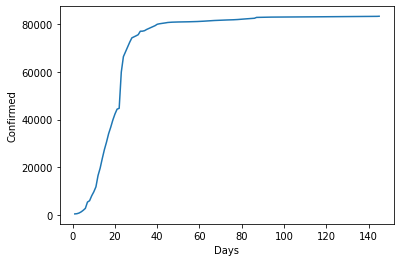

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.lineplot(y=dataset[dataset["Country/Region"]=="Mainland China"]["Confirmed"],x=dataset[dataset["Country/Region"]=="Mainland China"]["Days"])

In [6]:
data_path = "dataset/population_org.csv"
population = pd.read_csv(data_path)


In [7]:
population=population.sort_values(by=["country"])

d = {'country': population.country, 'population': population["pop"]}
population=pd.DataFrame(data=d)
population=population.dropna(subset = ["population"])
population["country"]=population["country"].str.strip('*')
population=population.replace("Cote d'Ivoire",'Ivory Coast')
population=population.replace('China','Mainland China')
population=population.replace('Korea, South','South Korea')
population=population.replace('United Kingdom','UK')
population=population.replace('Czechia','Czech Republic')
population["population"]=population["population"].str.replace(',', '', regex=False).astype(float)
population.loc[-1] = ['Hong Kong', 7496981]  # adding a row
population=population[population["country"]!="Diamond Princess"]

population.index = population.index + 1 

In [8]:
c_intersect=np.setdiff1d(np.array(dataset["Country/Region"].unique()), population.country.unique())
#np.intersect1d(population.country.unique(), np.array(dataset["Country/Region"].unique()))


In [9]:
for c in c_intersect:
        dataset=dataset[dataset["Country/Region"]!=c]


In [10]:
np.setdiff1d(population.country.unique(),np.array(dataset["Country/Region"].unique()))


array([], dtype=object)

In [11]:
np.setdiff1d(np.array(dataset["Country/Region"].unique()), population.country.unique())


array([], dtype=object)

In [12]:
population.insert(1,"Changed",False)

pop2=population
for c in countrys:
    if population.loc[population["country"]==c].duplicated("country").any():
        cr = population.loc[population["country"]==c]
        cr2 = population.loc[population["country"]==c]
        
        cr2.loc['Column_Total']= cr.iloc[0]
        cr2.loc['Column_Total','population']= cr.sum(numeric_only=True, axis=0).loc['population']
        cr2.loc['Column_Total','Changed'] = True
        cr=cr2.loc['Column_Total']
        #cr=cr.iloc[0]
        #print(ctr)
        pop2=pop2.append(cr,ignore_index=True)
pop2=pop2[pop2["Changed"]==True]
for c in countrys:
    if population.loc[population["country"]==c].duplicated("country").any():
        population=population[population["country"]!=c]
population=population.append(pop2)
population=population.drop(columns=["Changed"])

/home/emre/venv/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/emre/venv/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
population.to_csv(r'dataset/population.csv', index = False)
dataset.to_csv(r'dataset/covid_19_data.csv', index = False)